In [3]:
import bokeh
import pandas as pd

### Bokeh Example

In [72]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2
from bokeh.transform import factor_cmap
from bokeh.io import output_notebook
import pandas as pd

output_notebook() # Display Inline in Notebook

df = autompg2[["class", "hwy"]].rename(columns={"class": "kind"})

kinds = df.kind.unique()

# compute quantiles
qs = df.groupby("kind").hwy.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["kind", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="kind", how="left")

# compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

p = figure(x_range=kinds, tools="", toolbar_location=None,
           title="Highway MPG distribution by vehicle class",
           background_fill_color="#eaefef", y_axis_label="MPG")

# outlier range
whisker = Whisker(base="kind", upper="upper", lower="lower", source=source)
whisker.upper_head.size = whisker.lower_head.size = 20
p.add_layout(whisker)

# quantile boxes
cmap = factor_cmap("kind", "TolRainbow7", kinds)
p.vbar("kind", 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
p.vbar("kind", 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

# outliers
outliers = df[~df.hwy.between(df.lower, df.upper)]
p.scatter("kind", "hwy", source=outliers, size=6, color="black", alpha=0.3)

p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

show(p)

Loading BokehJS ...

### BoxPlot: Max Horizon vs Mean Log10 (across whole horizon)

In [43]:

from copy import deepcopy
df = deepcopy(res_df)
df.drop(columns="i",inplace=True)
# df


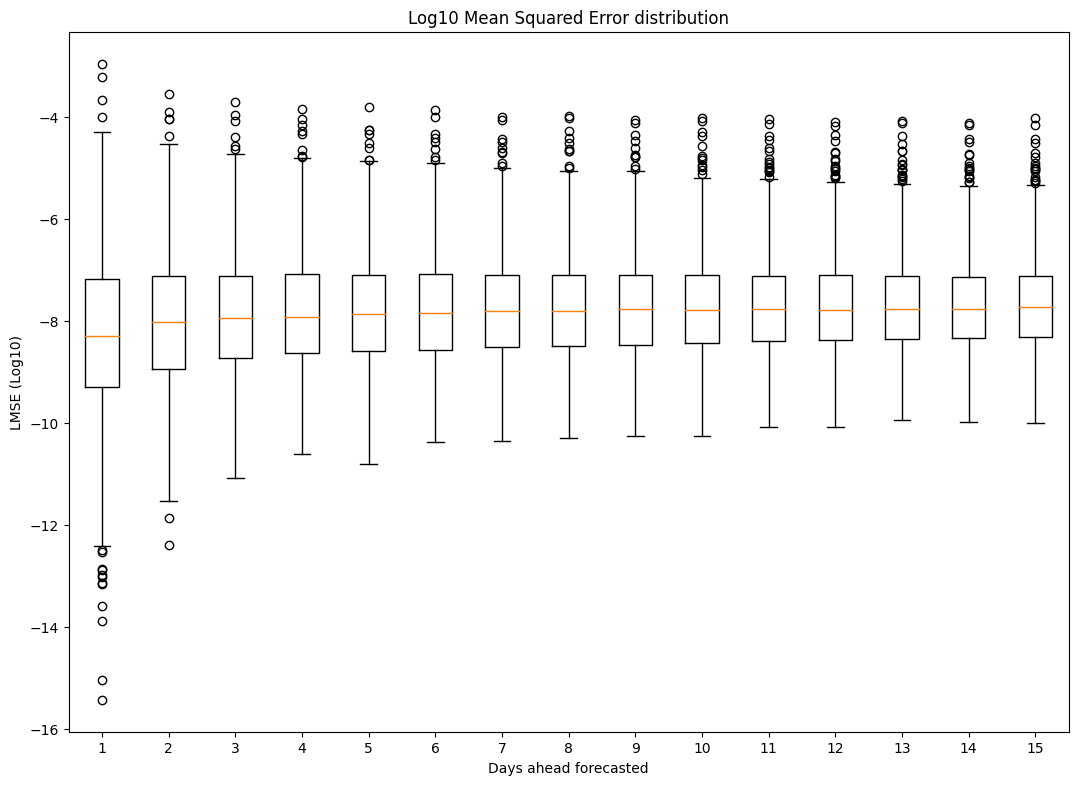

In [73]:
import matplotlib.pyplot as plt# Import libraries
import numpy as np
import pandas as pd
outFile="LastValueLMSE"
res_df = pd.read_json(f"{outFile}.json")
df = deepcopy(res_df)
df.drop(columns="i",inplace=True)
kinds = df.f.unique()
data =  [list(df[df.f==k].e) for k in kinds]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])# Creating axes instance
bp = ax.boxplot(data)# Creating plot
plt.xlabel("Days ahead forecasted")
plt.ylabel("LMSE (Log10)") # Log Mean Squared error
plt.title("Log10 Mean Squared Error distribution")
plt.show()# show plot



### BoxPlot: Days ahead forecasted vs Mean Log10 error (per day)

##### Last Figure Forecast

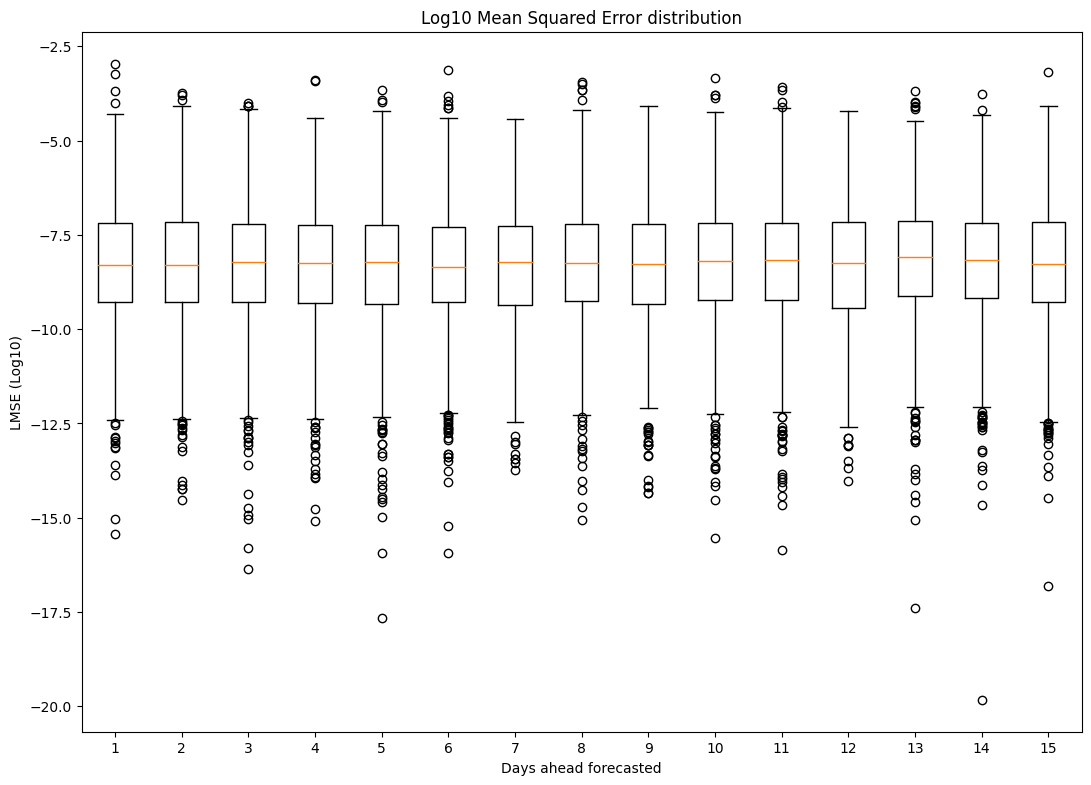

In [65]:
df = pd.read_csv("res.csv", header=None)
data =  [list(df[col]) for col in df.columns]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])# Creating axes instance 
bp = ax.boxplot(data)# Creating plot
plt.xlabel("Days ahead forecasted")
plt.ylabel("LMSE (Log10)") # Log Mean Squared error
plt.title("Log10 Mean Squared Error distribution")
plt.show()# show plot


In [9]:
import os 
# os.environ["BOKEH_NODEJS_PATH"] = "/usr/bin/nodejs"
!bokeh info

Python version      :  3.9.17 (main, Jun 13 2023, 16:00:45) 
IPython version     :  8.7.0
Tornado version     :  6.2
Bokeh version       :  3.2.1
BokehJS static path :  /usr/local/lib/python3.9/site-packages/bokeh/server/static
node.js version     :  v14.21.3
npm version         :  6.14.18
Operating system    :  Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31


In [ ]:
# apt-get install -y nodejs npm
# jupyter labextension install @jupyterlab/server-proxy
from bokeh.plotting import show
import os
import urllib
def remote_jupyter_proxy_url(port):
    """
    Callable to configure Bokeh's show method when a proxy must be
    configured.

    If port is None we're asking about the URL
    for the origin header.
    """
    base_url = os.environ['EXTERNAL_URL']
    host = urllib.parse.urlparse(base_url).netloc

    # If port is None we're asking for the URL origin
    # so return the public hostname.
    if port is None:
        return host

    service_url_path = os.environ['JUPYTERHUB_SERVICE_PREFIX']
    proxy_url_path = 'proxy/%d' % port

    user_url = urllib.parse.urljoin(base_url, service_url_path)
    full_url = urllib.parse.urljoin(user_url, proxy_url_path)
    return full_url